## Benchmarking

Benchmark Doddle against the entire dictionary to see how well it performs

In [1]:
from doddle import Doddle
from doddle.boards import Scoreboard
from doddle.benchmarking import Benchmark

doddle = Doddle(solver_type="entropy")
benchmark = doddle.benchmark("CRATE")
benchmark

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2315/2315 [00:52<00:00, 44.31it/s]


1 |                                                         (1)
2 | ***                                                    (83)
3 | **************************************************  (1,204)
4 | ****************************************              (969)
5 | **                                                     (58)

Guess:    CRATE
Games:    2,315
Guesses:  7,945
Mean:     3.432
Std:      0.608

## Decision Trees 🌴🌴🌴

`pip install doddle[decision]`

Once a benchmark has been calculated, you can easily render the full decision tree for the entire dictionary of solutions. The `digraph()` method takes an optional parameter that allows you to filter on specific games.

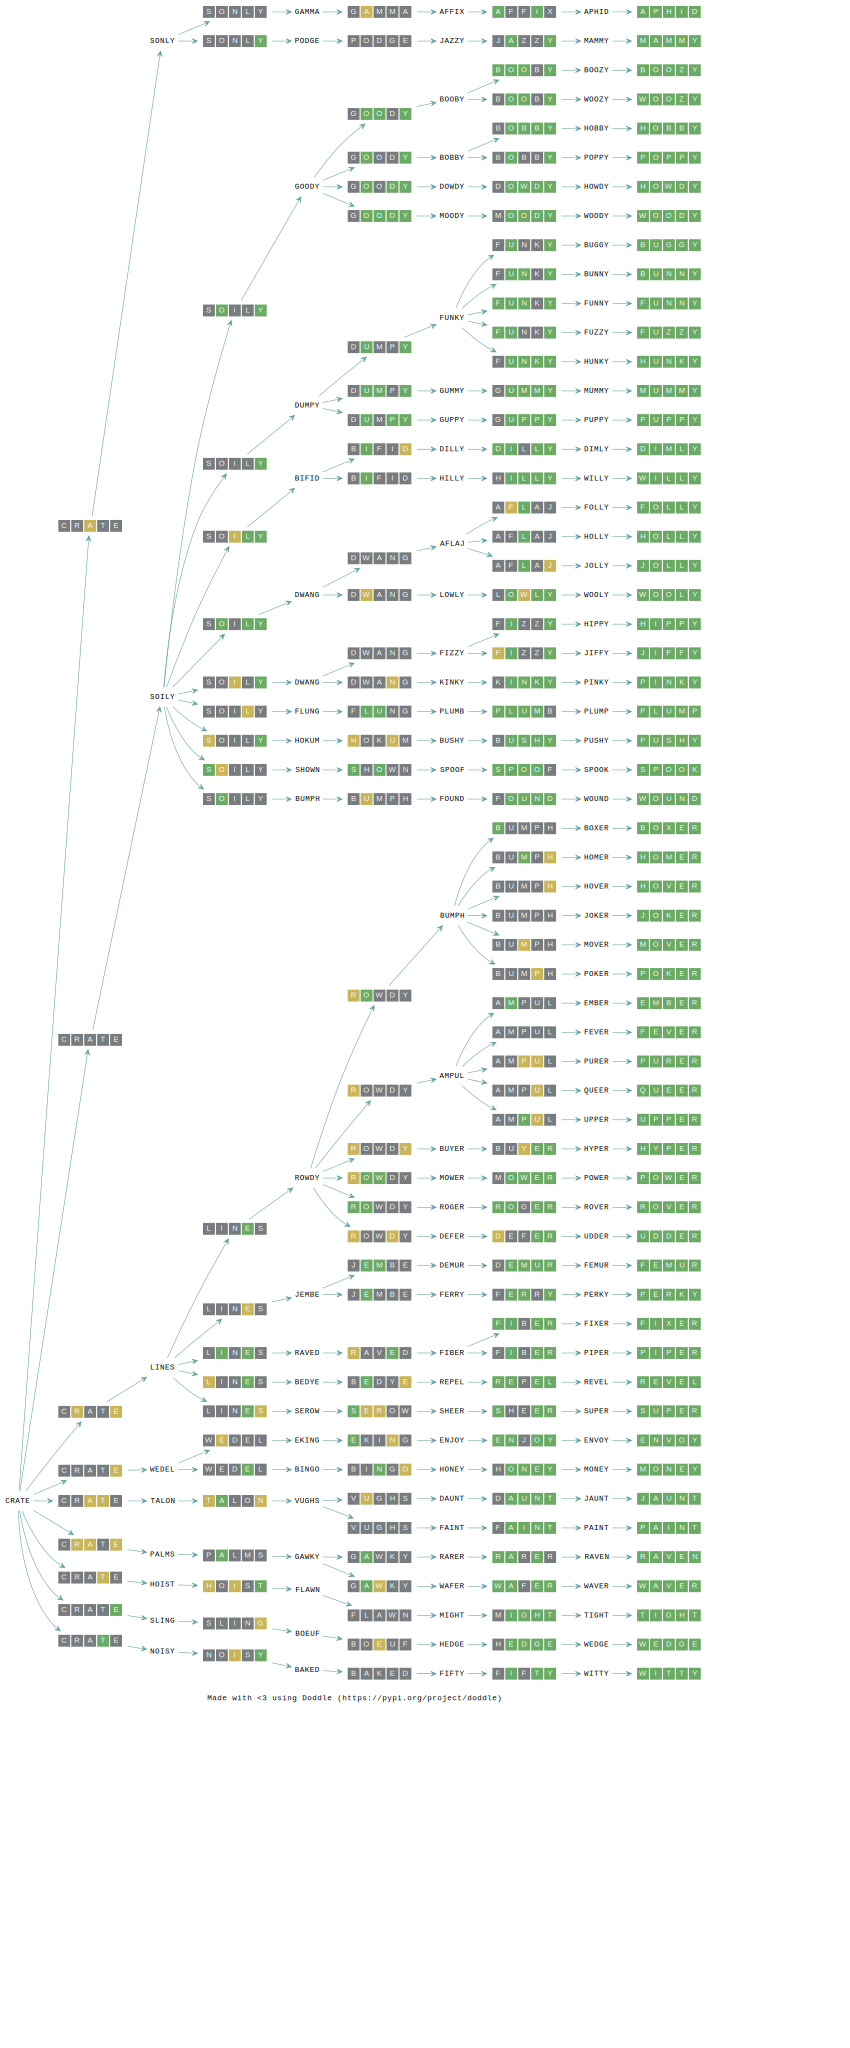

In [2]:
def get_worst_boards(game: Scoreboard) -> bool:
    return game.rows[-1].n == 5


benchmark.digraph(predicate=get_worst_boards)

## Wordle Bot
Doddle supports the [Wordle Bot](https://freshman.dev/wordle/#/leaderboard) leaderboard output format. Wordle Bot works with a comma separated text file of solutions. To output in the required format:

`benchmark.to_csv(filepath)`

More importantly, Doddle can create a benchmark from any Wordle Bot text file! Call `Benchmark.read_csv(filepath)` to load it in and start building decision trees from your own solves.

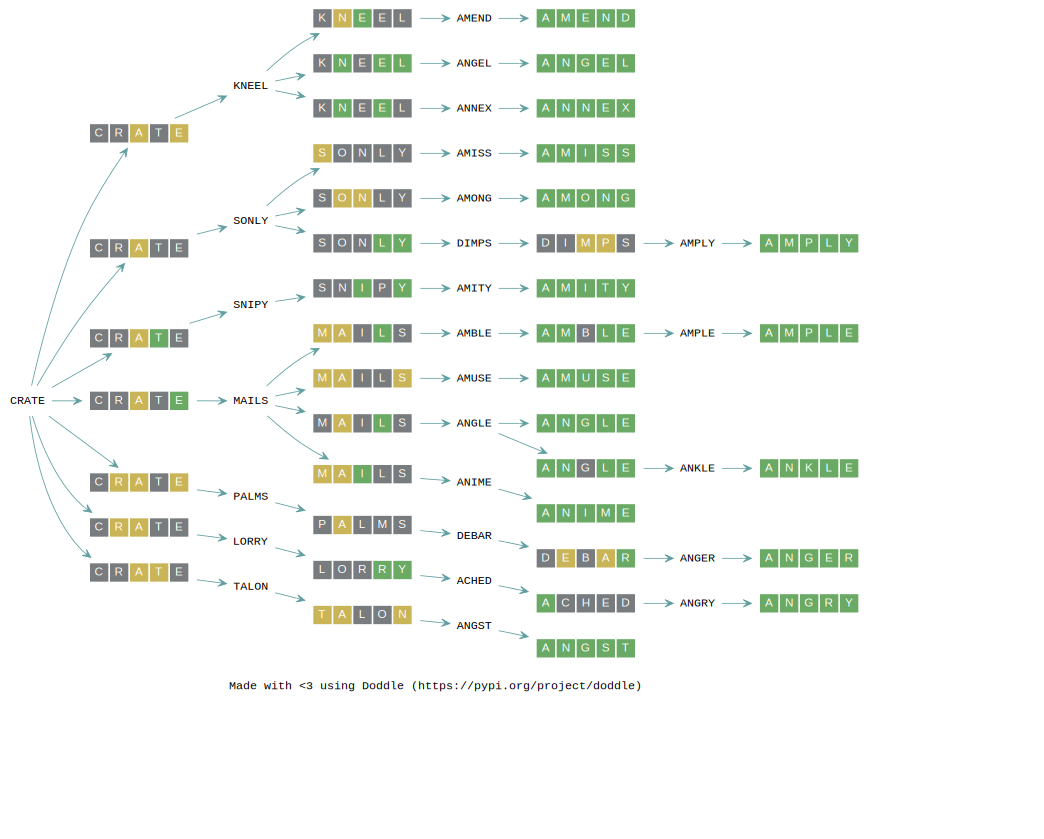

In [5]:
filepath = 'example.txt'

sample_csv = """
CRATE,KNEEL,AMEND
CRATE,SONLY,AMISS
CRATE,SNIPY,AMITY
CRATE,SONLY,AMONG
CRATE,MAILS,AMBLE,AMPLE
CRATE,SONLY,DIMPS,AMPLY
CRATE,MAILS,AMUSE
CRATE,KNEEL,ANGEL
CRATE,PALMS,DEBAR,ANGER
CRATE,MAILS,ANGLE
CRATE,LORRY,ACHED,ANGRY
CRATE,TALON,ANGST
CRATE,MAILS,ANIME
CRATE,MAILS,ANGLE,ANKLE
CRATE,KNEEL,ANNEX
"""

with open(filepath, "w") as f:
    f.write(sample_csv.strip())
    
sample_benchmark = Benchmark.read_csv(filepath)
sample_benchmark.digraph()